In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'


set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")  # to clean up output cells

# Load training and validation sets
ds_cat = image_dataset_from_directory(
    'Datasets',
    image_size=[100, 100],
    interpolation='nearest',
)
ds_cat_loaf = image_dataset_from_directory(
    'Datasets',
    image_size=[100, 100],
    interpolation='nearest',
)


# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_cat
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_cat_loaf
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [19]:
def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y, x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i + m, j:j + m] * kernel) + bias
    return new_image


image_string = tf.io.read_file('Datasets/cat/cat_12.jpg')
image = tf.image.decode_jpeg(image_string, channels=1)
img = tf.reshape(image, (100, 100)).numpy()
mask_ver = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
mask_hor = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
# mask = np.array([[1, 1, 0, -1, -1],
#                  [1, 0, 0, 0, -1],
#                  [0, 0, 0, 0, 0],
#                  [1, 0, 0, 0, -1],
#                  [1, 1, 0, -1, -1]
#                  ])
mask = np.array([[0, -1, -1],
                 [1, 0, -1],
                 [1, 1, 0],
                 ])
img_edges_ver = convolution2d(img, mask_ver, 0)
img_edges_hor = convolution2d(img, mask_hor, 0)
img_edges_test = convolution2d(img, mask, 0)

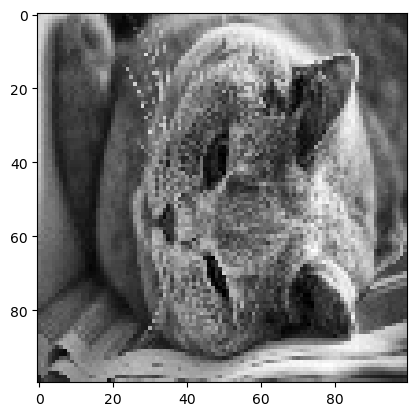

In [26]:
plt.imshow(img, interpolation='nearest', cmap='gray')
plt.show()

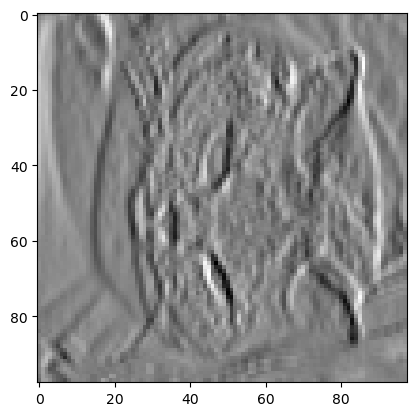

In [28]:
plt.imshow(img_edges_ver, interpolation='nearest', cmap='gray')
plt.show()

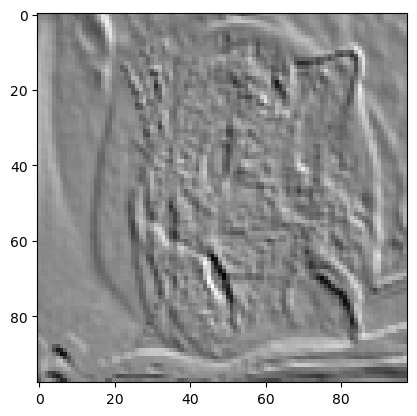

In [20]:
plt.imshow(img_edges_test, interpolation='nearest', cmap='gray')
plt.show()